<h1 align="center"> Logistic Regression </h1>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python </h3>
<h4 align="center"> By: Langtao Chen </h4>

In [1]:
# Import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

# Configure inline mode
%matplotlib inline

We use the titanic dataset to show how to conduct logistic regression in Python.

In [2]:
dat = pd.read_csv("../Data/titanic.csv")
dat.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.0000,0,0,211.3375
1,1,1,male,0.9167,1,2,151.5500
2,1,0,female,2.0000,1,2,151.5500
3,1,0,male,30.0000,1,2,151.5500
4,1,0,female,25.0000,1,2,151.5500


In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 71.7+ KB


In [4]:
dat = dat.dropna()

In [5]:
# Summary statistics
dat.describe()

,pclass,survived,age,sibsp,parch,fare
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,2.206699,0.408612,29.851834,0.503349,0.421053,36.686080
std,0.841542,0.491813,14.389201,0.912471,0.840052,55.732533
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,2.000000,0.000000,28.000000,0.000000,0.000000,15.750000
75%,3.000000,1.000000,39.000000,1.000000,1.000000,35.500000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Correlation matrix
dat.corr()

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.319979,-0.411086,0.047746,0.017685,-0.565255
survived,-0.319979,1.000000,-0.053958,-0.012657,0.114091,0.249164
age,-0.411086,-0.053958,1.000000,-0.243139,-0.150241,0.178739
sibsp,0.047746,-0.012657,-0.243139,1.000000,0.374291,0.141184
parch,0.017685,0.114091,-0.150241,0.374291,1.000000,0.216723
fare,-0.565255,0.249164,0.178739,0.141184,0.216723,1.000000


## 1. Frequency Table

Create frequency tables of the variable "survived".

In [7]:
# Frequency table
pd.crosstab(dat.survived, columns='count')

col_0,count
survived,
0,618
1,427


In [8]:
# Relative frequency table
pd.crosstab(dat.survived, columns='count')/pd.crosstab(dat.survived, columns='count').sum()

col_0,count
survived,
0,0.591388
1,0.408612


## 2. Preprocessing Data

Let's regress survived on other variables. The regression model is specified as:

$logit(survived=1) = \beta_0 + \beta_1*pclass + \beta_2*female + \beta_3*age +  \beta_4*sibsp + \beta_5*parch + \beta_6*fare + \epsilon$

To fit this regression model to the data, we need to prepare for two data sets:

- The y variable containing the survived column;
- The X variable containing both the "constant" term and all predictors with categorical variables converted as dummies.

In [9]:
y = dat['survived']
X = pd.DataFrame({'Const':1,
                  'pclass':dat['pclass'],
                  'female':dat['sex'].apply(lambda x: int(x=='female')),
                  'age':dat['age'],
                  'sibsp':dat['sibsp'],
                  'parch':dat['parch'],
                  'fare':dat['fare']})

In [10]:
# show head of y
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [11]:
# show head of X
X.head()

,Const,pclass,female,age,sibsp,parch,fare
0,1,1,1,29.0000,0,0,211.3375
1,1,1,0,0.9167,1,2,151.5500
2,1,1,1,2.0000,1,2,151.5500
3,1,1,0,30.0000,1,2,151.5500
4,1,1,1,25.0000,1,2,151.5500


## 3. Fit Model with Data

Fitting a model in statsmodels typically involves 3 easy steps:

- Use the model class to describe the model
- Fit the model using a class method
- Inspect the results using a summary method

In [12]:
#from scipy import stats
#stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Describe the logistic model
mod = sm.Logit(y,X)

# Fit model
fit = mod.fit()

# Summarize model
fit.summary()

Optimization terminated successfully.
         Current function value: 0.464293
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                          Logit   Df Residuals:                     1038
Method:                           MLE   Df Model:                            6
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.3135
Time:                        09:45:43   Log-Likelihood:                -485.19
converged:                       True   LL-Null:                       -706.79
Covariance Type:            nonrobust   LLR p-value:                 1.428e-92
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Const          2.2297      0.436      5.114      0.000       1.375       3.084
pclass        -1.0982      0.131     -8.364      0.000      -1.356      -0.841
female         2.5467      0.173     14.682      0.000       2.207       2.887
age           -0.0384      0.007     -5.862      0.000      -0.051      -0.026
sibsp         -0.3547      0.106     -3.351      0.001      -0.562      -0.147
parch          0.0549      0.103      0.533      0.594      -0.147       0.257
fare           0.0016      0.002      0.865      0.387      -0.002       0.005
==============================================================================
"""

In [13]:
# Show coefficient estimates
fit.params

Const     2.229660
pclass   -1.098227
female    2.546715
age      -0.038412
sibsp    -0.354726
parch     0.054925
fare      0.001641
dtype: float64

It is not straight forward to interpret coefficients of the logistic regression. Here, we show average marginal effects.

In [14]:
# Calculate average marginal effects
mfx = fit.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:               survived
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pclass        -0.1642      0.018     -9.279      0.000      -0.199      -0.129
female         0.3807      0.014     27.057      0.000       0.353       0.408
age           -0.0057      0.001     -6.174      0.000      -0.008      -0.004
sibsp         -0.0530      0.016     -3.407      0.001      -0.084      -0.023
parch          0.0082      0.015      0.533      0.594      -0.022       0.038
fare           0.0002      0.000      0.866      0.386      -0.000       0.001


We find that the average marginal effect of being female on survival is positive: 0.381. This means that the probability of survival is on average about 38 percentage points higher for female than for male, holding all other variables constant.

In [15]:
def plot_decision_boundary(model,X,y):
    padding=0.15
    res=0.1
    
    #max and min values of x and y of the dataset
    x_min,x_max=X[:,0].min(), X[:,0].max()
    y_min,y_max=X[:,1].min(), X[:,1].max()
    
    #range of x's and y's
    x_range=x_max-x_min
    y_range=y_max-y_min
    
    #add padding to the ranges
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    #create a meshgrid of points with the above ranges
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    
    #use model to predict class at each point on the grid
    #ravel turns the 2d arrays into vectors
    #c_ concatenates the vectors to create one long vector on which to perform prediction
    #finally the vector of prediction is reshaped to the original data shape.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])   
    Z = Z.reshape(xx.shape)
    
    #plot the contours on the grid
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    #plot the original data and labels
    plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap=plt.cm.Spectral)

In [16]:
# Plot decision boundary
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg')
model.fit(X[['age','fare']].values, y.values)

LogisticRegression(solver='newton-cg')

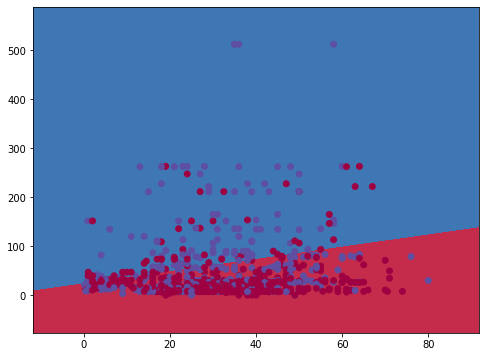

In [17]:
plot_decision_boundary(model,X[['age','fare']].values,y.values)

## 4. Predict New Data

We collect test data for Jack and Rose from the plot of the movie https://en.wikipedia.org/wiki/Titanic_(1997_film)


In [18]:
X.head()

,Const,pclass,female,age,sibsp,parch,fare
0,1,1,1,29.0000,0,0,211.3375
1,1,1,0,0.9167,1,2,151.5500
2,1,1,1,2.0000,1,2,151.5500
3,1,1,0,30.0000,1,2,151.5500
4,1,1,1,25.0000,1,2,151.5500


In [19]:
# Create a new dataset for Jack and Rose
New_X = pd.DataFrame([[1,3,0,19,0,0,5],
                      [1,1,1,17,0,1,500]])
New_X.columns = ["Const","pclass","female","age","sibsp","parch","fare"]
New_X.index = ['Jack','Rose']

New_X

,Const,pclass,female,age,sibsp,parch,fare
Jack,1,3,0,19,0,0,5
Rose,1,1,1,17,0,1,500


In [20]:
# Predict survival probability of Jack and Rose
New_X['prob'] = fit.predict(exog=New_X)

# Use cutoff=0.5 to classify survival
New_X['survived'] = New_X['prob'].apply(lambda x: 1 if x>=0.5 else 0)

New_X

,Const,pclass,female,age,sibsp,parch,fare,prob,survived
Jack,1,3,0,19,0,0,5,0.143484,0
Rose,1,1,1,17,0,1,500,0.980167,1
